# Perform Principal component analysis and perform clustering using first 3 principal component scores (both heirarchial and k mean clustering(scree plot or elbow curve) and obtain optimum number of clusters and check whether we have obtained same number of clusters with the original data.

# PCA-Principal Component Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import warnings 
import seaborn as sns
warnings.filterwarnings("ignore")

In [2]:
wine=pd.read_csv('wine.csv')

In [3]:
wine

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [4]:
wine.shape

(178, 14)

In [5]:
wine.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [6]:
wine.tail()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


# Performing EDA

In [7]:
wine.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [8]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [9]:
wine.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


<AxesSubplot:>

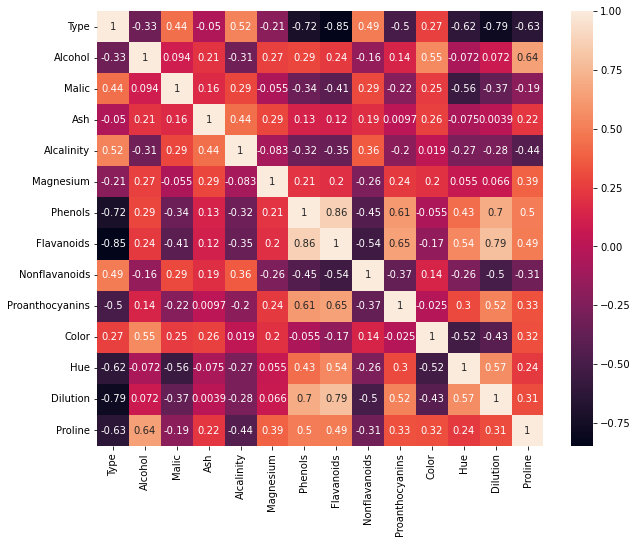

In [10]:
plt.figure(figsize=(10,8))
sns.heatmap(wine.corr(),annot=True)

In [11]:
wine.isnull()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,False,False,False,False,False,False,False,False,False,False,False,False,False,False
174,False,False,False,False,False,False,False,False,False,False,False,False,False,False
175,False,False,False,False,False,False,False,False,False,False,False,False,False,False
176,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
wine.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [13]:
x=wine.iloc[:,1:]
y=wine.iloc[:,0]

In [14]:
x

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [15]:
y

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Type, Length: 178, dtype: int64

In [16]:
y.head(20)

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
Name: Type, dtype: int64

In [17]:
y.tail(20)

158    3
159    3
160    3
161    3
162    3
163    3
164    3
165    3
166    3
167    3
168    3
169    3
170    3
171    3
172    3
173    3
174    3
175    3
176    3
177    3
Name: Type, dtype: int64

# PCA

In [18]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
X = scale.fit_transform(x)

In [19]:
X

array([[0.84210526, 0.1916996 , 0.57219251, ..., 0.45528455, 0.97069597,
        0.56134094],
       [0.57105263, 0.2055336 , 0.4171123 , ..., 0.46341463, 0.78021978,
        0.55064194],
       [0.56052632, 0.3201581 , 0.70053476, ..., 0.44715447, 0.6959707 ,
        0.64693295],
       ...,
       [0.58947368, 0.69960474, 0.48128342, ..., 0.08943089, 0.10622711,
        0.39728959],
       [0.56315789, 0.36561265, 0.54010695, ..., 0.09756098, 0.12820513,
        0.40085592],
       [0.81578947, 0.66403162, 0.73796791, ..., 0.10569106, 0.12087912,
        0.20114123]])

In [20]:
X.T

array([[0.84210526, 0.57105263, 0.56052632, ..., 0.58947368, 0.56315789,
        0.81578947],
       [0.1916996 , 0.2055336 , 0.3201581 , ..., 0.69960474, 0.36561265,
        0.66403162],
       [0.57219251, 0.4171123 , 0.70053476, ..., 0.48128342, 0.54010695,
        0.73796791],
       ...,
       [0.45528455, 0.46341463, 0.44715447, ..., 0.08943089, 0.09756098,
        0.10569106],
       [0.97069597, 0.78021978, 0.6959707 , ..., 0.10622711, 0.12820513,
        0.12087912],
       [0.56134094, 0.55064194, 0.64693295, ..., 0.39728959, 0.40085592,
        0.20114123]])

In [21]:
square_matrix=np.matmul(X.T,X)

In [22]:
square_matrix

array([[55.94790166, 29.9097306 , 50.85776808, 40.3039338 , 31.43080664,
        44.21969147, 34.78431046, 38.99647468, 35.32014777, 33.8433312 ,
        35.32701326, 46.07706767, 36.33945491],
       [29.9097306 , 26.34399459, 31.16619814, 27.68844994, 17.82295068,
        22.63945754, 16.62865863, 27.25449325, 19.36194062, 20.02725988,
        17.72207012, 23.85127192, 17.09583007],
       [50.85776808, 31.16619814, 55.3774486 , 45.90983516, 32.12776099,
        44.17025632, 34.77416007, 43.04752295, 35.73577489, 32.21452424,
        36.82931177, 47.11194688, 33.34675063],
       [40.3039338 , 27.68844994, 45.90983516, 42.66497502, 25.98963469,
        34.89911127, 26.82980991, 38.2920638 , 29.31732739, 26.42200746,
        30.12873187, 37.91656282, 24.27992411],
       [31.43080664, 17.82295068, 32.12776099, 25.98963469, 22.86838374,
        27.36664168, 21.64137314, 23.5192781 , 22.60934714, 19.63666715,
        22.61954754, 28.75199076, 21.67293618],
       [44.21969147, 22.639457

In [23]:
square_matrix.shape

(13, 13)

In [24]:
np.linalg.eigh(square_matrix)

(array([  0.77930495,   1.24972187,   1.47101377,   2.15358959,
          2.18932587,   2.70663782,   3.52460626,   4.53532115,
          5.32048043,   7.3385978 ,  15.58201667,  33.98475835,
        414.14031684]),
 array([[ 1.17293632e-02, -4.63268852e-02,  4.39219767e-01,
          6.63264100e-02, -1.26135175e-01, -5.20759147e-01,
          2.44007955e-01, -1.52380991e-01,  2.78723498e-01,
         -7.42911510e-02, -4.70938085e-01,  5.93471128e-02,
          3.49331221e-01],
        [ 3.11222296e-02,  3.28482651e-02, -1.44681204e-01,
         -2.39623133e-01, -4.60936782e-02,  1.10157761e-01,
         -2.86914593e-01, -2.03149100e-01,  4.13245420e-01,
          6.52666403e-01, -2.49845569e-02,  3.79436647e-01,
          2.01022373e-01],
        [-3.50619018e-01,  6.08411255e-01,  2.28218968e-01,
         -6.56655460e-02,  1.72606510e-02,  3.26494712e-01,
          2.45457172e-01, -1.90710900e-01, -2.89030725e-01,
         -1.81519904e-02,  7.61651902e-02,  1.74857096e-01,
          

In [25]:
v1=np.linalg.eigh(square_matrix)[1][:,12]
v2=np.linalg.eigh(square_matrix)[1][:,11]
v3=np.linalg.eigh(square_matrix)[1][:,10]
v4=np.linalg.eigh(square_matrix)[1][:,9]
v5=np.linalg.eigh(square_matrix)[1][:,8]
v6=np.linalg.eigh(square_matrix)[1][:,7]
v7=np.linalg.eigh(square_matrix)[1][:,6]
v8=np.linalg.eigh(square_matrix)[1][:,5]
v9=np.linalg.eigh(square_matrix)[1][:,4]
v10=np.linalg.eigh(square_matrix)[1][:,3]
v11=np.linalg.eigh(square_matrix)[1][:,2]
v12=np.linalg.eigh(square_matrix)[1][:,1]
v13=np.linalg.eigh(square_matrix)[1][:,0]






In [26]:
np.matmul(X,np.linalg.eigh(square_matrix)[1][:,::-1])

array([[ 1.9657543 , -0.49745318, -0.23356128, ...,  0.01419453,
         0.05153253, -0.00791953],
       [ 1.47874259, -0.48892092, -0.18445029, ..., -0.11248573,
         0.06377955, -0.00615617],
       [ 1.91122716, -0.32259152, -0.10595249, ...,  0.04262827,
         0.10035365, -0.02334514],
       ...,
       [ 1.40630966,  0.73871768, -0.43182955, ..., -0.17924787,
        -0.04077534,  0.03986594],
       [ 1.41162082,  0.6705388 , -0.30948499, ..., -0.06510667,
        -0.0391805 ,  0.01130863],
       [ 1.64708158,  0.91994397, -0.19950936, ...,  0.08348053,
        -0.01447744, -0.06553715]])

In [27]:
new_data=np.matmul(X,np.linalg.eigh(square_matrix)[1][:,::-1])

In [28]:
new_data

array([[ 1.9657543 , -0.49745318, -0.23356128, ...,  0.01419453,
         0.05153253, -0.00791953],
       [ 1.47874259, -0.48892092, -0.18445029, ..., -0.11248573,
         0.06377955, -0.00615617],
       [ 1.91122716, -0.32259152, -0.10595249, ...,  0.04262827,
         0.10035365, -0.02334514],
       ...,
       [ 1.40630966,  0.73871768, -0.43182955, ..., -0.17924787,
        -0.04077534,  0.03986594],
       [ 1.41162082,  0.6705388 , -0.30948499, ..., -0.06510667,
        -0.0391805 ,  0.01130863],
       [ 1.64708158,  0.91994397, -0.19950936, ...,  0.08348053,
        -0.01447744, -0.06553715]])

In [29]:
c=pd.DataFrame(new_data)

In [30]:
c

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.965754,-0.497453,-0.233561,0.026089,0.026691,-0.074433,-0.065640,-0.091287,-0.020998,0.304062,0.014195,0.051533,-0.007920
1,1.478743,-0.488921,-0.184450,-0.060043,0.240098,-0.100510,-0.003670,0.101123,-0.071526,0.104071,-0.112486,0.063780,-0.006156
2,1.911227,-0.322592,-0.105952,0.087453,-0.046445,0.119833,-0.106892,0.108599,0.219374,-0.055301,0.042628,0.100354,-0.023345
3,2.106077,-0.520098,-0.532945,0.072911,0.003523,0.120107,0.090347,0.181345,-0.025221,0.049909,0.013816,-0.135976,-0.052826
4,1.853606,-0.019308,0.115458,0.047741,-0.107207,-0.068469,-0.027883,0.080802,-0.132525,0.027625,0.106789,0.077772,-0.033823
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,1.486692,0.888320,-0.243248,0.229273,0.291643,-0.072341,-0.078999,0.037199,-0.006420,-0.050568,-0.035202,-0.005211,-0.019119
174,1.435216,0.682077,-0.198380,0.105112,-0.050274,-0.025590,-0.047392,-0.022644,0.047643,-0.085188,0.034348,-0.066004,-0.032070
175,1.406310,0.738718,-0.431830,0.139468,-0.072974,0.004863,-0.196149,-0.002869,-0.005707,0.067285,-0.179248,-0.040775,0.039866
176,1.411621,0.670539,-0.309485,-0.160215,-0.150953,0.108994,-0.151333,0.031821,0.010727,0.192551,-0.065107,-0.039180,0.011309


In [31]:
c.columns=["pc1","pc2","pc3","pc4","pc5","pc6","pc7","pc8","pc9","pc10","pc11","pc12","pc13"]

In [32]:
c

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13
0,1.965754,-0.497453,-0.233561,0.026089,0.026691,-0.074433,-0.065640,-0.091287,-0.020998,0.304062,0.014195,0.051533,-0.007920
1,1.478743,-0.488921,-0.184450,-0.060043,0.240098,-0.100510,-0.003670,0.101123,-0.071526,0.104071,-0.112486,0.063780,-0.006156
2,1.911227,-0.322592,-0.105952,0.087453,-0.046445,0.119833,-0.106892,0.108599,0.219374,-0.055301,0.042628,0.100354,-0.023345
3,2.106077,-0.520098,-0.532945,0.072911,0.003523,0.120107,0.090347,0.181345,-0.025221,0.049909,0.013816,-0.135976,-0.052826
4,1.853606,-0.019308,0.115458,0.047741,-0.107207,-0.068469,-0.027883,0.080802,-0.132525,0.027625,0.106789,0.077772,-0.033823
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,1.486692,0.888320,-0.243248,0.229273,0.291643,-0.072341,-0.078999,0.037199,-0.006420,-0.050568,-0.035202,-0.005211,-0.019119
174,1.435216,0.682077,-0.198380,0.105112,-0.050274,-0.025590,-0.047392,-0.022644,0.047643,-0.085188,0.034348,-0.066004,-0.032070
175,1.406310,0.738718,-0.431830,0.139468,-0.072974,0.004863,-0.196149,-0.002869,-0.005707,0.067285,-0.179248,-0.040775,0.039866
176,1.411621,0.670539,-0.309485,-0.160215,-0.150953,0.108994,-0.151333,0.031821,0.010727,0.192551,-0.065107,-0.039180,0.011309


In [33]:
from sklearn.decomposition import PCA
pcas =PCA()

In [34]:
x_pca = pcas.fit_transform(X)
x_pca.shape

(178, 13)

In [35]:
var = pcas.explained_variance_ratio_
var

array([0.40749485, 0.18970352, 0.08561671, 0.07426678, 0.05565301,
       0.04658837, 0.03663929, 0.02408789, 0.02274371, 0.02250965,
       0.01381292, 0.01273236, 0.00815095])

In [36]:
Var = np.cumsum(np.round(var,decimals= 4)*100)
Var

array([ 40.75,  59.72,  68.28,  75.71,  81.28,  85.94,  89.6 ,  92.01,
        94.28,  96.53,  97.91,  99.18, 100.  ])

Text(0, 0.5, 'Explained Variance')

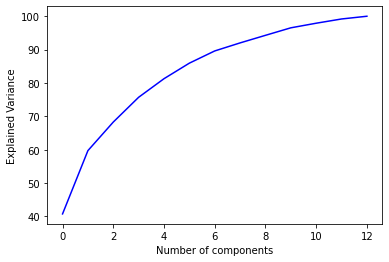

In [37]:
plt.plot(Var,color="blue");
plt.xlabel('Number of components')
plt.ylabel('Explained Variance')

In [38]:
print("Variance explained by the First principal component=",
     np.cumsum(Var)[0])


Variance explained by the First principal component= 40.75


In [39]:
pca=c.iloc[:,:3]
pca

,pc1,pc2,pc3
0,1.965754,-0.497453,-0.233561
1,1.478743,-0.488921,-0.184450
2,1.911227,-0.322592,-0.105952
3,2.106077,-0.520098,-0.532945
4,1.853606,-0.019308,0.115458
...,...,...,...
173,1.486692,0.888320,-0.243248
174,1.435216,0.682077,-0.198380
175,1.406310,0.738718,-0.431830
176,1.411621,0.670539,-0.309485


In [40]:
var[:3].sum()  # thiis is the percentage of importance of 3 pca's

0.6828150695968221

# Projecting PC1, PC2, PC3 in 3D scatter plot

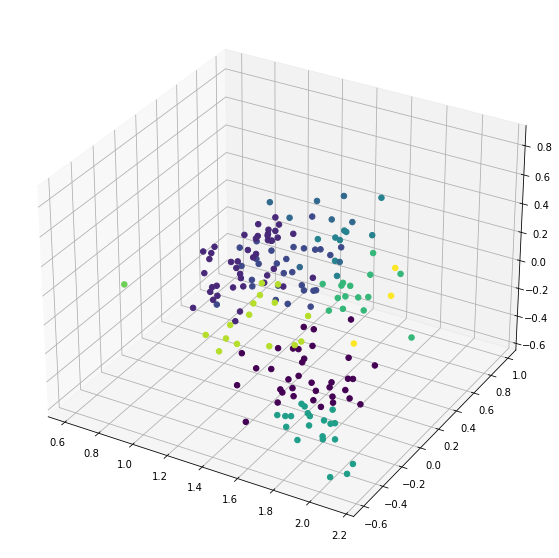

In [87]:
plt.figure(figsize = (10, 10))
ax = plt.axes(projection ="3d")
ax.scatter3D( pca.iloc[:,0],pca.iloc[:,1],pca.iloc[:,2], c=hc.fit_predict(pca), s=30, alpha=1)


# Heirrarchical Clustering

In [41]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [42]:
pca

,pc1,pc2,pc3
0,1.965754,-0.497453,-0.233561
1,1.478743,-0.488921,-0.184450
2,1.911227,-0.322592,-0.105952
3,2.106077,-0.520098,-0.532945
4,1.853606,-0.019308,0.115458
...,...,...,...
173,1.486692,0.888320,-0.243248
174,1.435216,0.682077,-0.198380
175,1.406310,0.738718,-0.431830
176,1.411621,0.670539,-0.309485


In [43]:
df=pca.iloc[:,:3]

In [44]:
df

,pc1,pc2,pc3
0,1.965754,-0.497453,-0.233561
1,1.478743,-0.488921,-0.184450
2,1.911227,-0.322592,-0.105952
3,2.106077,-0.520098,-0.532945
4,1.853606,-0.019308,0.115458
...,...,...,...
173,1.486692,0.888320,-0.243248
174,1.435216,0.682077,-0.198380
175,1.406310,0.738718,-0.431830
176,1.411621,0.670539,-0.309485


In [45]:
df_1=pd.concat([df,wine['Type']],axis=1)

In [46]:
df_1

,pc1,pc2,pc3,Type
0,1.965754,-0.497453,-0.233561,1
1,1.478743,-0.488921,-0.184450,1
2,1.911227,-0.322592,-0.105952,1
3,2.106077,-0.520098,-0.532945,1
4,1.853606,-0.019308,0.115458,1
...,...,...,...,...
173,1.486692,0.888320,-0.243248,3
174,1.435216,0.682077,-0.198380,3
175,1.406310,0.738718,-0.431830,3
176,1.411621,0.670539,-0.309485,3


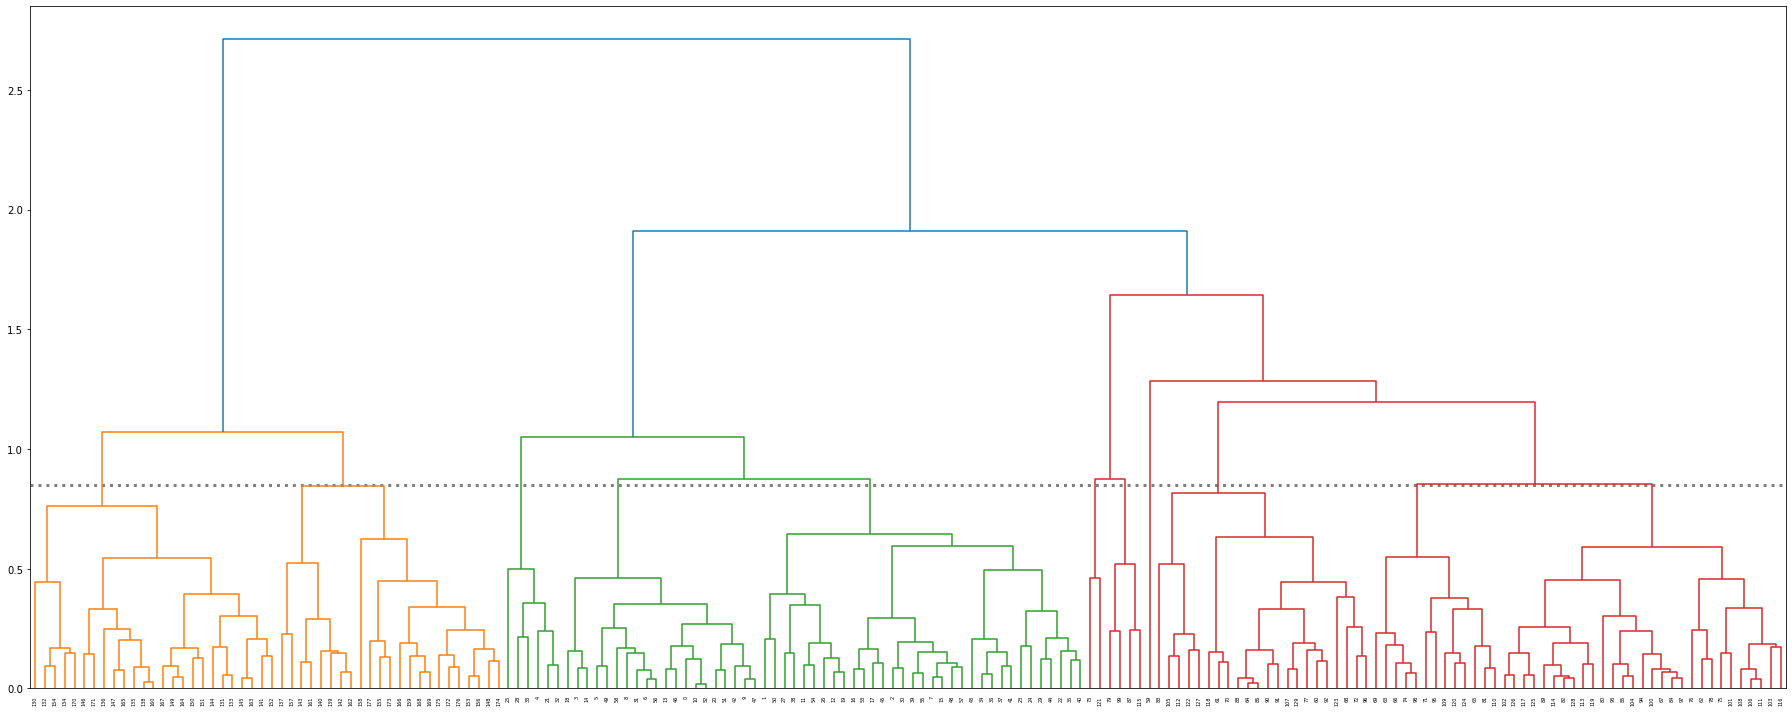

In [47]:
# Dendrogram
plt.figure(figsize=(25,10))
plt.axhline(y=0.85,c='gray',lw=3,linestyle=':')
dendrogram=sch.dendrogram(sch.linkage(df_1,method='complete'),orientation='top')
plt.tight_layout()
     

In [48]:
hc=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='complete')
     

In [49]:
hc.fit(df)

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [50]:
y_hc=hc.fit_predict(df)

In [51]:
y_hc

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 1, 2, 1, 2,
       2, 1, 1, 2, 0, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [52]:
df_1['H_Cluster_ID']=y_hc

In [53]:
df_1

,pc1,pc2,pc3,Type,H_Cluster_ID
0,1.965754,-0.497453,-0.233561,1,2
1,1.478743,-0.488921,-0.184450,1,2
2,1.911227,-0.322592,-0.105952,1,2
3,2.106077,-0.520098,-0.532945,1,2
4,1.853606,-0.019308,0.115458,1,2
...,...,...,...,...,...
173,1.486692,0.888320,-0.243248,3,0
174,1.435216,0.682077,-0.198380,3,0
175,1.406310,0.738718,-0.431830,3,0
176,1.411621,0.670539,-0.309485,3,0


# K-Means Clustering

In [54]:
# Importing Libraries for K-Means Clustering

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score,silhouette_samples

In [55]:
data=df_1.drop(['H_Cluster_ID'],axis=1)

In [56]:
data

,pc1,pc2,pc3,Type
0,1.965754,-0.497453,-0.233561,1
1,1.478743,-0.488921,-0.184450,1
2,1.911227,-0.322592,-0.105952,1
3,2.106077,-0.520098,-0.532945,1
4,1.853606,-0.019308,0.115458,1
...,...,...,...,...
173,1.486692,0.888320,-0.243248,3
174,1.435216,0.682077,-0.198380,3
175,1.406310,0.738718,-0.431830,3
176,1.411621,0.670539,-0.309485,3


In [57]:
X=data.iloc[:,:3]

In [58]:
X

,pc1,pc2,pc3
0,1.965754,-0.497453,-0.233561
1,1.478743,-0.488921,-0.184450
2,1.911227,-0.322592,-0.105952
3,2.106077,-0.520098,-0.532945
4,1.853606,-0.019308,0.115458
...,...,...,...
173,1.486692,0.888320,-0.243248
174,1.435216,0.682077,-0.198380
175,1.406310,0.738718,-0.431830
176,1.411621,0.670539,-0.309485


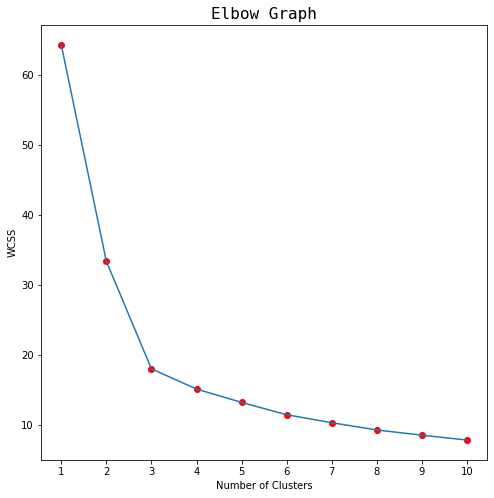

In [59]:
# Plotting the Elbow-Graph

wcss=[]

for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=10)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,8))
plt.plot(range(1,11),wcss)
plt.scatter(range(1,11),wcss,color='r')
plt.xticks(range(1,11))
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Graph',family='monospace',fontsize=16)
plt.show()

In [60]:
#Therefore we conclude that there are 3 clusters are formed.

# silhouette score

In [84]:
from sklearn.metrics import silhouette_score as sil

In [85]:
nc=[2,3,4,5,6,7,8,9,10]
sc_score=[]    
for i in nc:
    hc = AgglomerativeClustering(n_clusters=i, affinity = 'euclidean', linkage = 'complete')

    y=hc.fit_predict(pca)
    sc_score.append(sil(pca,y))


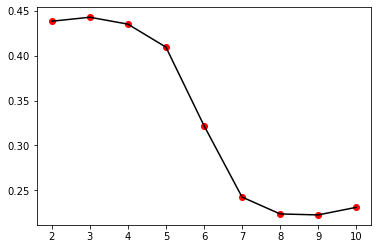

In [86]:
plt.plot(nc,sc_score,color="black")
plt.scatter(nc,sc_score,color="red")
plt.show()

# Now we applying Hirarchical clustering and Kmeans clustering to a original data

In [67]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
     

In [68]:
wine

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [69]:
# Normalizing Function

def norm_func(i):
  x=(i-i.min())/(i.max()-i.min())
  return x

In [70]:
norm_wine=norm_func(wine)

In [71]:
norm_wine

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,0.0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.0,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.0,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.0,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.0,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,1.0,0.705263,0.970356,0.582888,0.510309,0.271739,0.241379,0.056962,0.735849,0.205047,0.547782,0.130081,0.172161,0.329529
174,1.0,0.623684,0.626482,0.598930,0.639175,0.347826,0.282759,0.086498,0.566038,0.315457,0.513652,0.178862,0.106227,0.336662
175,1.0,0.589474,0.699605,0.481283,0.484536,0.543478,0.210345,0.073840,0.566038,0.296530,0.761092,0.089431,0.106227,0.397290
176,1.0,0.563158,0.365613,0.540107,0.484536,0.543478,0.231034,0.071730,0.754717,0.331230,0.684300,0.097561,0.128205,0.400856


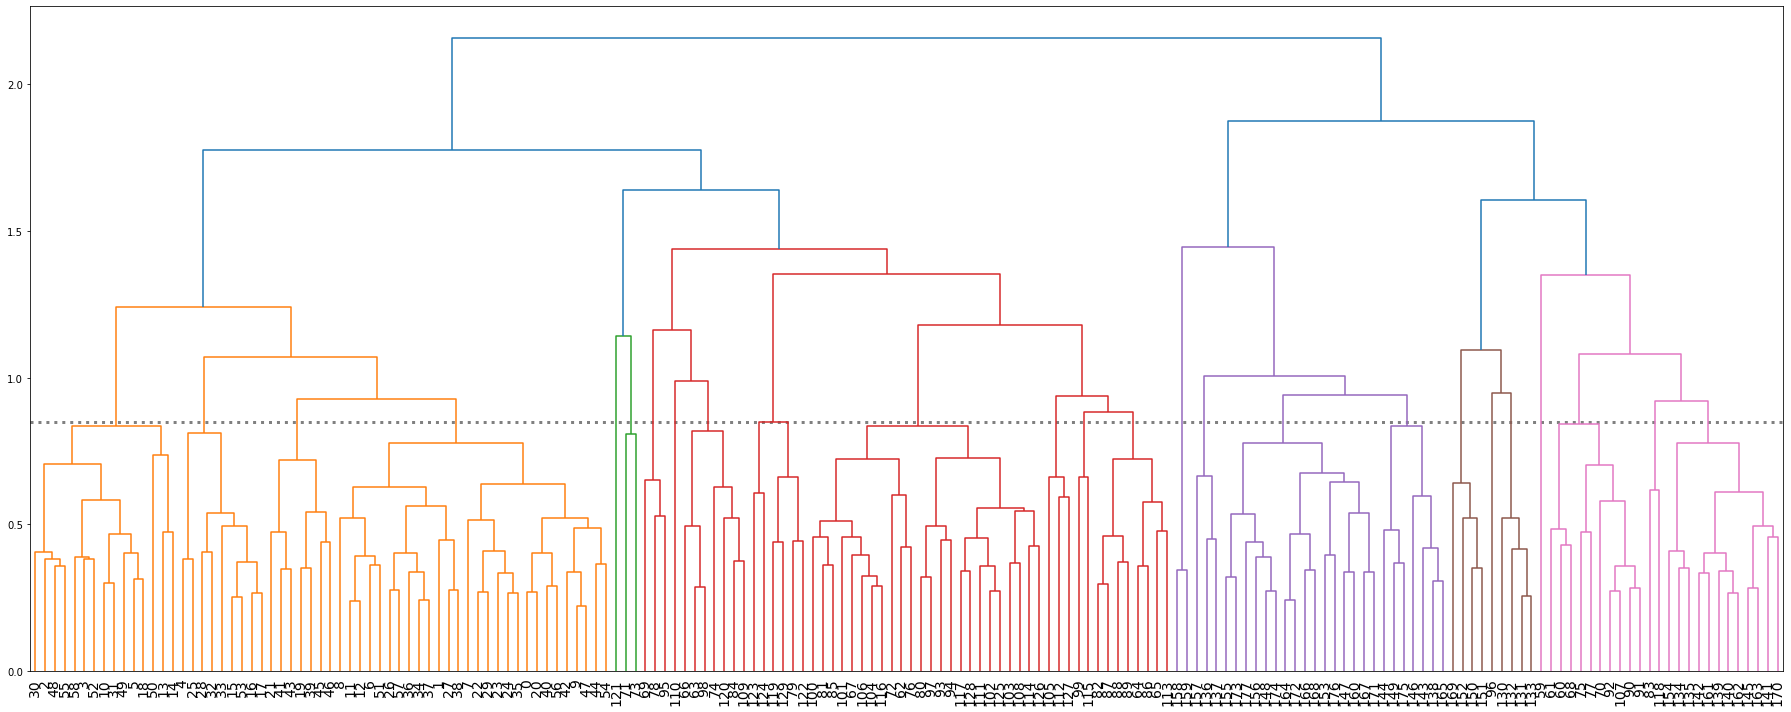

In [72]:
# Dendrogram
plt.figure(figsize=(25,10))
plt.axhline(y=0.85,c='gray',lw=3,linestyle=':')
dendrogram=sch.dendrogram(sch.linkage(norm_wine,method='complete'),orientation='top',labels=wine.index,leaf_font_size=14)
plt.tight_layout()

In [73]:
hc=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='complete')

In [74]:
hc.fit(norm_wine)

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [75]:
y_hc=hc.fit_predict(norm_wine)

In [76]:
y_hc

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2,
       1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2,
       2, 2], dtype=int64)

In [77]:
wine['H_Cluster_ID']=y_hc

In [78]:
wine

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,H_Cluster_ID
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


In [79]:
#K-Means Clustering

In [80]:
# Importing Libraries for K-Means Clustering

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score,silhouette_samples

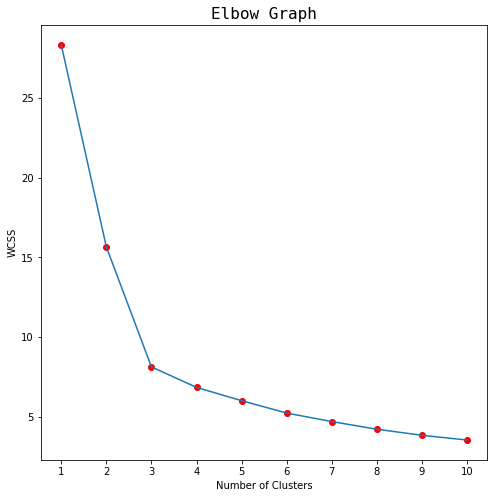

In [95]:
# Plotting the Elbow-Graph

wcss=[]

for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=10)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,8))
plt.plot(range(1,11),wcss)
plt.scatter(range(1,11),wcss,color='r')
plt.xticks(range(1,11))
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Graph',family='monospace',fontsize=16)
plt.show()
     

In [81]:
# Now fitting our model for 3 clusters

clustered=KMeans(n_clusters=3,init='k-means++',random_state=10)
clustered.fit(X)

KMeans(n_clusters=3, random_state=10)

In [82]:
clustered.labels_
     

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2,
       0, 2, 2, 2, 1, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

# Conclusion
both heirarchial and k mean clustering for the PCA data and Original data has given a same optimal no. of clusters. i,e. = 3.